In [1]:
import torch.nn as nn
import torch

In [2]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [3]:
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
#create simple neural netwrok
class SimpleNeuralnet(nn.Module):
    def __init__(self):
        super(SimpleNeuralnet, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(10,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.sequential(x)
        return x
    

In [5]:
#initilize network
network = SimpleNeuralnet()

In [6]:
#compile network
network = torch.compile(network)

In [7]:
#define loss function
criterion = nn.BCELoss()

In [8]:
# define otimizer
optimizer = RMSprop(network.parameters())

In [9]:
# create dataset
features, target = make_classification(n_classes=2, n_features=10, n_samples=1000)

In [10]:
features_train,features_test,target_train,target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [11]:
# dataset
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

In [12]:
#data loader from dataset
train_data = TensorDataset(x_train,y_train)
train_loader = DataLoader(train_data, batch_size=100,shuffle=True)

In [ ]:
#train network
epochs=3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch+1} \n Loss: {loss.item()}")

In [ ]:
#evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print(f"test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy.item()}")

### Multiclass classification

In [ ]:
# create dataset
features, target = make_classification(n_classes=3, n_features=10, n_samples=1000, n_informative=9, n_redundant=0)

In [ ]:
torch.manual_seed(0)
np.random.seed(0)

In [ ]:
features_train,features_test,target_train,target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [ ]:
# dataset
x_train = torch.from_numpy(features_train).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(target_train).long(),num_classes=3).float()
x_test = torch.from_numpy(features_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(target_test).long(),num_classes=3).float()

In [ ]:
#create simple neural netwrok
class SimpleNeuralNeMulti(nn.Module):
    def __init__(self):
        super(SimpleNeuralNeMulti, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(10,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,3),
            nn.Softmax()
        )
    def forward(self, x):
        x = self.sequential(x)
        return x
    

In [ ]:
#network
network = SimpleNeuralNeMulti()

In [ ]:
#define loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
#define optimizer
optimizer = RMSprop(network.parameters())

In [ ]:
#dataset for dataloader
train_data = TensorDataset(x_train, y_train)

In [ ]:
#dataloader for layers
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

In [ ]:
#compile
network = torch.compile(network)

In [ ]:

epochs=3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch+1} \n Loss: {loss.item()}")

In [ ]:
#evaluate neural network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print(f"test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy.item()}")

In [ ]:
## making predictions
with torch.no_grad():
    predicted = network.forward(x_test).round()

In [ ]:
predicted[0]

### Plot train test errors of a binary classifier

In [15]:
epochs = 8
train_losses = []
test_losses = []
for epoch in range(8):
    for batch_idx, (data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        train_output = network(x_train)
        train_loss = criterion(output, target)
        train_losses.append(train_loss.item())

        test_output = network(x_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())
        

In [16]:
from matplotlib import pyplot as plt

In [17]:
epochs = range(epochs)

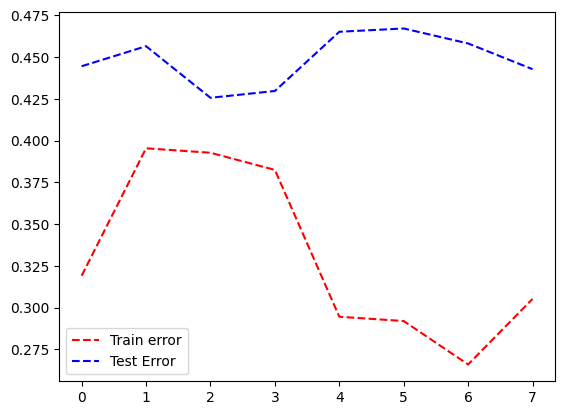

In [20]:
plt.plot(epochs, train_losses, "r--")
plt.plot(epochs, test_losses, "b--")
plt.legend(["Train error", "Test Error"])
plt.show()